In [1]:
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['Age','Income($)']])

In [6]:
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [7]:
df['cluster']=y_predict

In [8]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

In [9]:
df0

,Name,Age,Income($),cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0
18,Nick,43,64000,0


C:\Users\04khu\AppData\Local\Temp\ipykernel_11236\3588693825.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


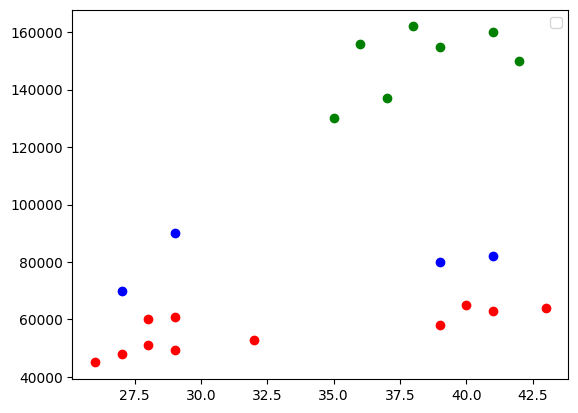

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df0['Age'],df0['Income($)'],color='red')
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.legend()

In [11]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

In [14]:
df[['Age','Income($)']]=scalar.fit_transform(df[['Age','Income($)']])

In [18]:
model=KMeans(n_clusters=3)

In [20]:
y_predict=model.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predict

In [21]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [22]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]


In [23]:
df0

,Name,Age,Income($),cluster
16,Dipika,0.823529,0.170940,0
17,Priyanka,0.882353,0.153846,0
18,Nick,1.000000,0.162393,0
19,Alia,0.764706,0.299145,0
20,Sid,0.882353,0.316239,0
21,Abdul,0.764706,0.111111,0


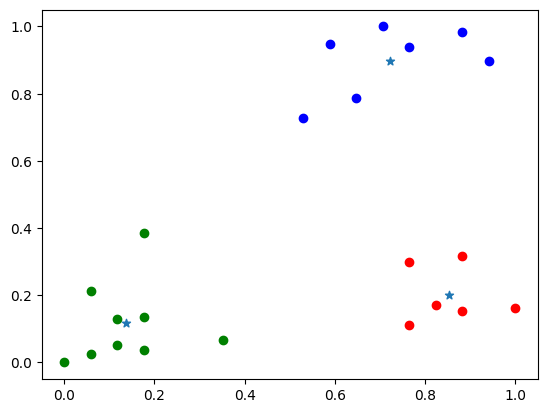

In [27]:
plt.scatter(df0['Age'],df0['Income($)'],color='red')
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='*')

In [25]:
model.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [34]:
k_range=range(1,10)
sse=[]
for k in k_range:
    model.n_clusters=k;
    model.fit(df[['Age','Income($)']])
    sse.append(model.inertia_)

In [35]:
sse

[5.434011511988178, 0.10857155279123165]